# Overview

Notebook to explore the TCGA metadata datasets and clean some of them for accurate upload in BigQuery.

# Imports

In [3]:
import sys
#add the data path
sys.path.append('../data')

In [149]:
import numpy as np
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
from pathlib import Path
import plotly.express as px

# File paths

In [20]:
data_dir = Path('../data/')

In [21]:
samples_path = Path(data_dir / 'sample.tsv')
slides_path = Path(data_dir / 'slide.tsv')

# EDA and cleanup of samples metadata

In [23]:
sample_df = pd.read_csv(samples_path, sep='\t')

In [30]:
sample_df.head()

,project.project_id,cases.case_id,cases.submitter_id,samples.biospecimen_anatomic_site,samples.biospecimen_laterality,samples.catalog_reference,samples.composition,samples.current_weight,samples.days_to_collection,samples.days_to_sample_procurement,...,samples.specimen_type,samples.state,samples.submitter_id,samples.time_between_clamping_and_freezing,samples.time_between_excision_and_freezing,samples.tissue_collection_type,samples.tissue_type,samples.tumor_code,samples.tumor_code_id,samples.tumor_descriptor
0,TARGET-AML,69b4ad12-4436-53bf-a552-cee9a1ae4025,TARGET-20-PATETC,'--,'--,'--,'--,'--,'--,'--,...,Bone Marrow NOS,released,TARGET-20-PATETC-09A,'--,'--,'--,Tumor,Acute myeloid leukemia (AML),20,Primary
1,BEATAML1.0-COHORT,4bcb5c53-d625-43ac-9448-ebe07b9d705f,2829,'--,'--,'--,'--,'--,'--,'--,...,Solid Tissue,released,BA3442D,'--,'--,'--,Normal,'--,'--,Not Applicable
2,BEATAML1.0-COHORT,4bcb5c53-d625-43ac-9448-ebe07b9d705f,2829,'--,'--,'--,'--,'--,'--,'--,...,Peripheral Blood NOS,released,BA3245R,'--,'--,'--,Tumor,'--,'--,Recurrence
3,BEATAML1.0-COHORT,4bcb5c53-d625-43ac-9448-ebe07b9d705f,2829,'--,'--,'--,'--,'--,'--,'--,...,Peripheral Blood NOS,released,BA3245D,'--,'--,'--,Tumor,'--,'--,Recurrence
4,MP2PRT-ALL,508996da-a6e0-4451-ac47-7f927d90c809,MP2PRT-PATIRV,Bone Marrow,'--,'--,Whole Bone Marrow,'--,'--,'--,...,Whole Bone Marrow,released,MP2PRT-PATIRV-TMP1-A,'--,'--,'--,Tumor,'--,'--,Primary


**There are many columns with majority values being '--**

In [51]:
print("Columns with a value '-- :'")
for col in sample_df.columns:
    if "'--" in sample_df[col].values:
        print(col)    

Columns with a value '-- :'
samples.biospecimen_anatomic_site
samples.biospecimen_laterality
samples.catalog_reference
samples.composition
samples.current_weight
samples.days_to_collection
samples.days_to_sample_procurement
samples.diagnosis_pathologically_confirmed
samples.distance_normal_to_tumor
samples.distributor_reference
samples.freezing_method
samples.growth_rate
samples.initial_weight
samples.intermediate_dimension
samples.is_ffpe
samples.longest_dimension
samples.method_of_sample_procurement
samples.oct_embedded
samples.passage_count
samples.pathology_report_uuid
samples.sample_ordinal
samples.sample_type
samples.sample_type_id
samples.shortest_dimension
samples.time_between_clamping_and_freezing
samples.time_between_excision_and_freezing
samples.tissue_collection_type
samples.tumor_code
samples.tumor_code_id


**Clean up those columns by replacing those values with None or np.nan based on the data type.**

In [139]:
# create a copy of the data
sample_df2 = sample_df.copy()

In [140]:
cols_to_clean = []

for col in sample_df2.columns:

    # values with string only values
    if "'--" in sample_df2[col].values:
        cols_to_clean.append(col)

    # now replace those values everywhere
    sample_df2[cols_to_clean] = sample_df2[cols_to_clean].replace("'--", np.nan).infer_objects(copy=False)

# check again
# if any of the cols have the value still, it will show True
(sample_df2[cols_to_clean] == "'--").any()

samples.biospecimen_anatomic_site             False
samples.biospecimen_laterality                False
samples.catalog_reference                     False
samples.composition                           False
samples.current_weight                        False
samples.days_to_collection                    False
samples.days_to_sample_procurement            False
samples.diagnosis_pathologically_confirmed    False
samples.distance_normal_to_tumor              False
samples.distributor_reference                 False
samples.freezing_method                       False
samples.growth_rate                           False
samples.initial_weight                        False
samples.intermediate_dimension                False
samples.is_ffpe                               False
samples.longest_dimension                     False
samples.method_of_sample_procurement          False
samples.oct_embedded                          False
samples.passage_count                         False
samples.path

**The '-- values should be replaced now.**

In [141]:
sample_df2

,project.project_id,cases.case_id,cases.submitter_id,samples.biospecimen_anatomic_site,samples.biospecimen_laterality,samples.catalog_reference,samples.composition,samples.current_weight,samples.days_to_collection,samples.days_to_sample_procurement,...,samples.specimen_type,samples.state,samples.submitter_id,samples.time_between_clamping_and_freezing,samples.time_between_excision_and_freezing,samples.tissue_collection_type,samples.tissue_type,samples.tumor_code,samples.tumor_code_id,samples.tumor_descriptor
0,TARGET-AML,69b4ad12-4436-53bf-a552-cee9a1ae4025,TARGET-20-PATETC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow NOS,released,TARGET-20-PATETC-09A,NaN,NaN,NaN,Tumor,Acute myeloid leukemia (AML),20,Primary
1,BEATAML1.0-COHORT,4bcb5c53-d625-43ac-9448-ebe07b9d705f,2829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Solid Tissue,released,BA3442D,NaN,NaN,NaN,Normal,NaN,NaN,Not Applicable
2,BEATAML1.0-COHORT,4bcb5c53-d625-43ac-9448-ebe07b9d705f,2829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Peripheral Blood NOS,released,BA3245R,NaN,NaN,NaN,Tumor,NaN,NaN,Recurrence
3,BEATAML1.0-COHORT,4bcb5c53-d625-43ac-9448-ebe07b9d705f,2829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Peripheral Blood NOS,released,BA3245D,NaN,NaN,NaN,Tumor,NaN,NaN,Recurrence
4,MP2PRT-ALL,508996da-a6e0-4451-ac47-7f927d90c809,MP2PRT-PATIRV,Bone Marrow,NaN,NaN,Whole Bone Marrow,NaN,NaN,NaN,...,Whole Bone Marrow,released,MP2PRT-PATIRV-TMP1-A,NaN,NaN,NaN,Tumor,NaN,NaN,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88294,TARGET-AML,2f3e5463-3243-4efc-b586-1788d57ccfad,TARGET-20-PAWIIK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow NOS,released,TARGET-20-PAWIIK-09A,NaN,NaN,NaN,Tumor,NaN,20,Primary
88295,TARGET-ALL-P2,5f1fddd5-6d05-5fe4-83e6-af3895ab1733,TARGET-10-PARFVZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow NOS,released,TARGET-10-PARFVZ-04A,NaN,NaN,NaN,Tumor,Acute lymphoblastic leukemia (ALL),10,Recurrence
88296,TARGET-ALL-P2,5f1fddd5-6d05-5fe4-83e6-af3895ab1733,TARGET-10-PARFVZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bone Marrow NOS,released,TARGET-10-PARFVZ-09A,NaN,NaN,NaN,Tumor,Acute lymphoblastic leukemia (ALL),10,Primary
88297,FM-AD,678df8bb-1b71-4485-a700-7a4fc2734177,AD15396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unknown,released,AD15396_sample,NaN,NaN,NaN,Tumor,NaN,NaN,Primary


**Next, go through each column and change any value containing the abbreviation NOS to 'not otherwise specified'**

In [142]:
def define_nos(value):
    if type(value) == str and 'NOS' in value.split():
        value = value.replace('NOS', 'not otherwise specified')
    return value

In [143]:
sample_df2 = sample_df2.map(define_nos)

In [147]:
# confirm change:
sample_df2.iloc[0]['samples.specimen_type']

'Bone Marrow not otherwise specified'

## Visualizations

### Breakdown of anatomic site of samples based on the project

In [231]:
sites_df = sample_df2.groupby(['project.project_id', 'samples.biospecimen_anatomic_site'])['cases.case_id'].count().reset_index()

In [239]:
# for effective visualization, take only cases > 10
sites_df2 = sites_df.groupby('samples.biospecimen_anatomic_site')['cases.case_id'].sum().reset_index()
sites_df2 = sites_df2.rename(columns={'cases.case_id':'total_number_cases'})

selected_sites = sites_df2[sites_df2['total_number_cases']>=20]['samples.biospecimen_anatomic_site'].values
axis_order = sites_df2[sites_df2['samples.biospecimen_anatomic_site'].isin(selected_sites)].sort_values(by='total_number_cases', ascending=False)
axis_order['samples.biospecimen_anatomic_site'].values

array(['Blood', 'Bone Marrow', 'Lung', 'Kidney', 'Uterus', 'Breast',
       'Liver', 'Pancreas', 'Thyroid', 'Other', 'Brain', 'Prostate',
       'Lymph Node', 'Frontal Lobe', 'Bone', 'Tongue', 'Soft Tissue',
       'Cerebrum', 'Maxilla', 'Abdomen', 'Chest Wall',
       'Lymph Node(s) Axilla', 'Abdominal Wall', 'Pelvis'], dtype=object)

In [240]:
sites_df2[sites_df2['samples.biospecimen_anatomic_site']=='Chest Wall']

,samples.biospecimen_anatomic_site,total_number_cases
21,Chest Wall,35


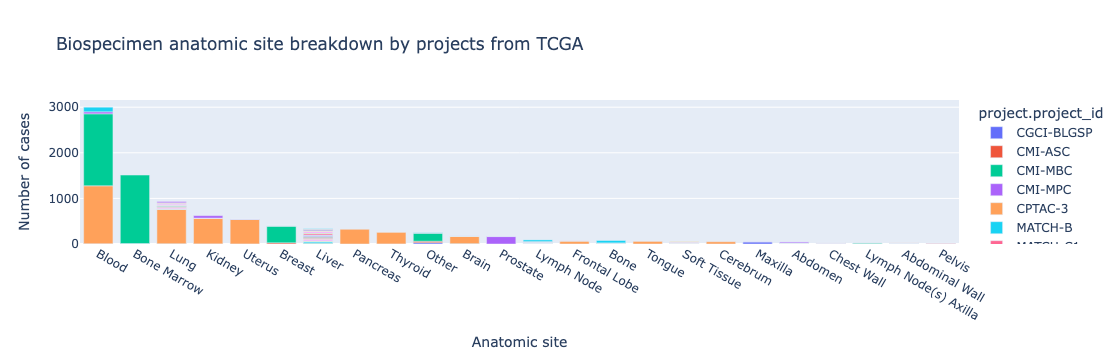

In [242]:
fig = px.bar(sites_df[sites_df['samples.biospecimen_anatomic_site'].isin(selected_sites)], 
             x='samples.biospecimen_anatomic_site', 
             y='cases.case_id',
             color='project.project_id',
             category_orders={'samples.biospecimen_anatomic_site': axis_order['samples.biospecimen_anatomic_site'].values},
             title='Biospecimen anatomic site breakdown by projects from TCGA',
             labels={'cases.case_id': 'Number of cases', 'samples.biospecimen_anatomic_site': 'Anatomic site'})
fig.show()